# About the Project


## AirQo African Air Quality Prediction Challenge

Can Sentinel 5P data predict air quality across Africa to promote environmental justice?

Air pollution is the world’s largest environmental health risk, contributing to 7 million premature deaths annually. The most heavily affected are often poor people in developing countries. Low-cost IoT sensor networks on the ground hold potential to fill climate data gaps in sub-Saharan Africa, but implementation and maintenance in African cities remain costly.

Satellite-derived PM2.5 estimates, based on Aerosol Optical Depth (AOD) and machine learning techniques, can help predict pollution levels over vast areas. This information supports the development of interventions like vulnerability profiles for urban areas, health preservation, environmental protection for affected populations, community empowerment, and climate change mitigation.

### Project Objective

In this challenge, the goal is to estimate PM2.5 levels from satellite observations using Aerosol Optical Depth (AOD) data for eight cities in seven African countries: Lagos, Accra, Nairobi, Yaounde, Bujumbura, Kisumu, Kampala, and Gulu. These estimates will be compared against ground-based monitoring data from these cities, validating the satellite-derived estimates.

### Evaluation

The evaluation metric for this competition is Root Mean Squared Error (RMSE).


### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import math

from scipy.interpolate import make_interp_spline

%matplotlib inline 

### Loading Dataset

In [2]:
data = pd.read_csv('air_data.csv')

### Data Inspection

In [3]:
data.shape

(8071, 80)

In [4]:
data.head()

,id,site_id,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,...,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
0,id_vjcx08sz91,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-10-25,13,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.015000
1,id_bkg215syli,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-02,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.267200
2,id_oui2pot3qd,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-03,13,NaN,NaN,...,6791.682888,51171.802486,5791.682829,11.816715,0.192757,-96.411890,61.045123,-121.307414,41.898269,39.450741
3,id_9aandqzy4n,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-08,14,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.537600
4,id_ali5x2m4iw,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-09,13,0.000267,0.774656,...,1451.050659,96215.906250,451.050598,10.521009,0.153114,-97.811241,49.513439,-126.064453,40.167355,19.431731


In [5]:
data.head()

,id,site_id,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,...,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
0,id_vjcx08sz91,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-10-25,13,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.015000
1,id_bkg215syli,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-02,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.267200
2,id_oui2pot3qd,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-03,13,NaN,NaN,...,6791.682888,51171.802486,5791.682829,11.816715,0.192757,-96.411890,61.045123,-121.307414,41.898269,39.450741
3,id_9aandqzy4n,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-08,14,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.537600
4,id_ali5x2m4iw,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-09,13,0.000267,0.774656,...,1451.050659,96215.906250,451.050598,10.521009,0.153114,-97.811241,49.513439,-126.064453,40.167355,19.431731


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8071 entries, 0 to 8070
Data columns (total 80 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   id                                                        8071 non-null   object 
 1   site_id                                                   8071 non-null   object 
 2   site_latitude                                             8071 non-null   float64
 3   site_longitude                                            8071 non-null   float64
 4   city                                                      8071 non-null   object 
 5   country                                                   8071 non-null   object 
 6   date                                                      8071 non-null   object 
 7   hour                                                      8071 non-null   int64  
 8   sulphurdioxide_so2

In [7]:
data.isna().sum()

id                               0
site_id                          0
site_latitude                    0
site_longitude                   0
city                             0
                              ... 
cloud_sensor_azimuth_angle    3077
cloud_sensor_zenith_angle     3077
cloud_solar_azimuth_angle     3077
cloud_solar_zenith_angle      3077
pm2_5                            0
Length: 80, dtype: int64

In [8]:
data.describe()

,site_latitude,site_longitude,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,...,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
count,8071.000000,8071.000000,8071.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,...,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,8071.000000
mean,0.635678,30.246982,10.877463,0.000024,0.687295,0.000013,0.126581,2.120939,38.671939,-92.912582,...,6089.449805,58478.947647,5105.978072,16.885186,0.255501,-18.952179,45.881380,-84.811978,28.708028,24.639296
std,2.154605,9.393151,0.815875,0.000354,0.142544,0.000220,0.094129,85.450554,18.964322,43.240479,...,2991.879500,18974.281900,2971.949265,27.547282,0.046204,85.873938,14.721454,40.627170,7.038309,24.878920
min,-3.459970,3.201510,10.000000,-0.000980,0.299364,-0.000696,0.000000,-107.710861,0.177093,-165.131509,...,521.378113,10752.090499,9.741494,1.458444,0.090547,-102.706078,2.996863,-159.058782,10.314990,1.200000
25%,0.288630,32.568643,10.000000,-0.000196,0.589849,-0.000137,0.038062,-98.911720,22.811537,-134.823883,...,3687.102253,43231.418685,2701.118575,5.612198,0.228117,-98.865659,37.901279,-125.371559,24.102775,13.270600
50%,0.332610,32.600480,11.000000,0.000012,0.669632,0.000007,0.123876,71.653160,42.564364,-95.848477,...,5389.787844,60432.792969,4389.787844,8.752905,0.257323,-97.477511,49.187592,-74.597511,29.002745,18.375400
75%,0.374653,32.641110,11.000000,0.000221,0.766817,0.000149,0.209070,74.110476,54.238408,-49.662067,...,8047.738159,74276.492371,7047.738159,14.794590,0.285948,72.814735,57.156175,-49.902340,33.929767,28.838400
max,6.595400,36.914272,14.000000,0.002024,1.607052,0.001101,0.299850,77.319656,66.234924,-22.250822,...,17287.677734,100909.219778,16287.677734,250.000002,0.417945,77.319656,66.238778,-22.251009,45.496395,456.193333


In [9]:
df = data.copy()

### Data Cleaning

In [10]:
#converting the negative numerical values to

num = df.select_dtypes(include=['float64', 'int64']).abs()

df[num.columns] = num

##### The Pm2_5 cap given for the project instruction was 180

In [11]:
df.loc[df['pm2_5'] > 180, 'pm2_5'] = 180

In [12]:
missing_value = df.isnull().mean()*100
missing_value.sort_values(ascending=False)

uvaerosollayerheight_aerosol_height          94.709454
uvaerosollayerheight_solar_zenith_angle      94.709454
uvaerosollayerheight_solar_azimuth_angle     94.709454
uvaerosollayerheight_sensor_azimuth_angle    94.709454
uvaerosollayerheight_sensor_zenith_angle     94.709454
                                               ...    
country                                       0.000000
city                                          0.000000
site_longitude                                0.000000
site_latitude                                 0.000000
pm2_5                                         0.000000
Length: 80, dtype: float64

In [13]:
# A deeper look at the percentage of the missing values
missing_value.tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 60.85986866559286,
 60.85986866559286,
 60.85986866559286,
 60.85986866559286,
 60.85986866559286,
 60.85986866559286,
 60.85986866559286,
 60.85986866559286,
 60.85986866559286,
 0.0,
 44.975839425102215,
 44.975839425102215,
 44.975839425102215,
 44.975839425102215,
 44.975839425102215,
 44.975839425102215,
 44.975839425102215,
 44.975839425102215,
 61.54132077809441,
 61.54132077809441,
 61.54132077809441,
 61.54132077809441,
 61.54132077809441,
 61.54132077809441,
 61.54132077809441,
 61.54132077809441,
 61.54132077809441,
 61.54132077809441,
 61.54132077809441,
 61.54132077809441,
 48.50700037170115,
 48.50700037170115,
 48.50700037170115,
 48.50700037170115,
 48.50700037170115,
 48.50700037170115,
 48.50700037170115,
 48.50700037170115,
 0.061950192045595334,
 0.061950192045595334,
 0.061950192045595334,
 0.061950192045595334,
 0.061950192045595334,
 0.061950192045595334,
 1.3876843018213356,
 1.3876843018213356,
 1.387684301821335

##### Removing columns with 90% missing values and above

In [14]:
threshold = 90

# percentage of missing values in each column
missing_percentage = df.isnull().mean()*100

# columns to drop
columns_to_drop = missing_value[missing_value > threshold].index

# Drop columns with more than 90% missing values
df.drop(columns=columns_to_drop, inplace =  True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8071 entries, 0 to 8070
Data columns (total 73 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   id                                                        8071 non-null   object 
 1   site_id                                                   8071 non-null   object 
 2   site_latitude                                             8071 non-null   float64
 3   site_longitude                                            8071 non-null   float64
 4   city                                                      8071 non-null   object 
 5   country                                                   8071 non-null   object 
 6   date                                                      8071 non-null   object 
 7   hour                                                      8071 non-null   int64  
 8   sulphurdioxide_so2

 **Sulphur Dioxide (SO₂),** **Nitrogen Dioxide (NO₂),** **and Carbon Monoxide (CO) columns** are very important indicators
because they play a major role in atmospheric conditions that impact PM2.5 dispersion and persistence. Hence, the three columns can't be dropped if we are to make correct pm2.5 predictions. 
- **Reference** [link](https://www.sciencedirect.com/science/article/abs/pii/S0048969721050865)
 
 
 
 
 **Sulphur Dioxide (SO₂)**:
  - Crucial for assessing respiratory impacts and acid rain formation.
- **Nitrogen Dioxide (NO₂)**:
  - Indicator of traffic pollution, linked to respiratory diseases and PM2.5 formation.
- **Carbon Monoxide (CO)**:
  - Harmful at high concentrations, indicates incomplete combustion.

#### Handling Missing Values
###### Sensitivity and Variability
- Pollutant levels vary greatly with environmental changes, making precise data essential.
- Imputing with means for large volume of missing values can distort this variability and misrepresent trends.

- In that case **Advanced Imputation** like **Interpolation** is needed

- **Interpolation methods** use existing data points surrounding the missing values to estimate what the value might be if it were observed.

In [16]:
#Numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

#Replacing missing values through  interpolation
df[numerical_cols] = df[numerical_cols].interpolate(method='linear', axis=0)

# Selecting non-numerical columns
non_numerical_cols = df.select_dtypes(exclude=['float64', 'int64']).columns

# Filling missing values in non-numerical columns with the mode (most frequent value)
for col in non_numerical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verifying if missing values have been handled
df.isnull().sum().sort_values(ascending=False)

nitrogendioxide_solar_azimuth_angle     4
sulphurdioxide_solar_azimuth_angle      4
nitrogendioxide_solar_zenith_angle      4
nitrogendioxide_sensor_zenith_angle     4
nitrogendioxide_sensor_azimuth_angle    4
                                       ..
uvaerosolindex_sensor_zenith_angle      0
uvaerosolindex_solar_azimuth_angle      0
uvaerosolindex_solar_zenith_angle       0
ozone_o3_column_number_density          0
pm2_5                                   0
Length: 73, dtype: int64

##### Since the maximum number of missing values found in any of the columns is now 4, we can now make use of mean to fill it in

In [17]:
# Fill missing values in numerical columns with mean
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
# Verify that missing values have been handled
df.isnull().sum().sort_values(ascending=False)

id                                     0
nitrogendioxide_solar_zenith_angle     0
ozone_o3_column_number_density_amf     0
ozone_o3_column_number_density         0
uvaerosolindex_solar_zenith_angle      0
                                      ..
carbonmonoxide_solar_azimuth_angle     0
carbonmonoxide_sensor_zenith_angle     0
carbonmonoxide_sensor_azimuth_angle    0
carbonmonoxide_sensor_altitude         0
pm2_5                                  0
Length: 73, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8071 entries, 0 to 8070
Data columns (total 73 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   id                                                        8071 non-null   object 
 1   site_id                                                   8071 non-null   object 
 2   site_latitude                                             8071 non-null   float64
 3   site_longitude                                            8071 non-null   float64
 4   city                                                      8071 non-null   object 
 5   country                                                   8071 non-null   object 
 6   date                                                      8071 non-null   object 
 7   hour                                                      8071 non-null   int64  
 8   sulphurdioxide_so2

In [19]:
## Checking the Categorical Columns

for col in df.columns:
    if col in non_numerical_cols:
        print(col)
        print(df[col].unique(), '\n')
        print(df[col].value_counts(), '\n')

id
['id_vjcx08sz91' 'id_bkg215syli' 'id_oui2pot3qd' ... 'id_csqjqt3f9i'
 'id_tv6dzkz7ii' 'id_qgxtderh4p'] 

id
id_vjcx08sz91    1
id_7u1tjvdcr0    1
id_fpqx3c0lca    1
id_z16qs3462g    1
id_8ltovwnhrq    1
                ..
id_r22vhr9usa    1
id_udfrcv3n3j    1
id_wh3n7hi9jl    1
id_4nr7fjr8zo    1
id_qgxtderh4p    1
Name: count, Length: 8071, dtype: int64 

site_id
['6531a46a89b3300013914a36' '6448483a87020e00297bee3b'
 '655f78d8f6246d0013d51e5d' '65803bbf20f085001273b0b1'
 '60d058c8048305120d2d6147' '60d058c8048305120d2d6156'
 '60d058c8048305120d2d615a' '616fe4ce9657420029658b3e'
 '6353b53377ee57002903db54' '6572c7f70c67750014f20c90'
 '65688bab06e4e400141db85b' '64db3e98149b3c001a52c89e'
 '652e8f12319d650019be0444' '6572c93f24e8bf0013024fa2'
 '64a5755320511a001d1b4a3e' '64ad2c9de42253002982c4e9'
 '64f594d280d12e001a02c609' '62b310512e0eca001e0aab11'
 '60d058c8048305120d2d615c' '624d2f9a994194001ddccbb6'
 '65549d7a0711ae0013927f9e' '6448449ac15916001e128cdc'
 '60d058c8048305120d2d615

In [20]:
df_0 = df[numerical_cols]
df_0.head()

,site_latitude,site_longitude,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,...,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
0,6.53257,3.39936,13,0.000262,0.701246,0.000174,0.133458,84.493954,39.037141,89.321801,...,6054.152723,58691.919068,5071.351870,16.268318,0.251779,86.934775,45.433655,88.501771,28.692221,12.015000
1,6.53257,3.39936,12,0.000262,0.701246,0.000174,0.133458,84.493954,39.037141,89.321801,...,6054.152723,58691.919068,5071.351870,16.268318,0.251779,86.934775,45.433655,88.501771,28.692221,42.267200
2,6.53257,3.39936,13,0.000262,0.701246,0.000174,0.133458,84.493954,39.037141,89.321801,...,6791.682888,51171.802486,5791.682829,11.816715,0.192757,96.411890,61.045123,121.307414,41.898269,39.450741
3,6.53257,3.39936,14,0.000262,0.701246,0.000174,0.133458,84.493954,39.037141,89.321801,...,4121.366774,73693.854368,3121.366714,11.168862,0.172936,97.111566,55.279281,123.685934,41.032812,10.537600
4,6.53257,3.39936,13,0.000267,0.774656,0.000207,0.223403,97.811241,49.513344,126.064468,...,1451.050659,96215.906250,451.050598,10.521009,0.153114,97.811241,49.513439,126.064453,40.167355,19.431731


In [21]:
df_1 = df[non_numerical_cols]
df_1.head()

,id,site_id,city,country,date
0,id_vjcx08sz91,6531a46a89b3300013914a36,Lagos,Nigeria,2023-10-25
1,id_bkg215syli,6531a46a89b3300013914a36,Lagos,Nigeria,2023-11-02
2,id_oui2pot3qd,6531a46a89b3300013914a36,Lagos,Nigeria,2023-11-03
3,id_9aandqzy4n,6531a46a89b3300013914a36,Lagos,Nigeria,2023-11-08
4,id_ali5x2m4iw,6531a46a89b3300013914a36,Lagos,Nigeria,2023-11-09


### Exploratory Data Analysis (EDA)

In [22]:
df.describe()

,site_latitude,site_longitude,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,...,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
count,8071.000000,8071.000000,8071.000000,8.071000e+03,8071.000000,8.071000e+03,8071.000000,8071.000000,8071.000000,8071.000000,...,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000
mean,1.211261,30.246982,10.877463,2.618323e-04,0.701246,1.743546e-04,0.133458,84.493954,39.037141,89.321801,...,6054.152723,58691.919068,5071.351870,16.268318,0.251779,86.934775,45.433655,88.501771,28.692221,24.154609
std,1.891857,9.393151,0.815875,2.042462e-04,0.127801,1.231421e-04,0.081990,10.873796,16.228768,41.601766,...,2760.795033,17705.796982,2742.191425,24.392656,0.045470,11.247925,12.804579,40.839963,6.386583,19.792712
min,0.218200,3.201510,10.000000,3.981684e-07,0.299364,1.245546e-07,0.000000,70.020539,0.177093,22.250822,...,521.378113,10752.090499,9.741494,1.458444,0.090547,70.682945,2.996863,22.251009,10.314990,1.200000
25%,0.332300,32.568643,10.000000,1.150788e-04,0.615469,8.080453e-05,0.068731,74.120526,27.679300,48.690832,...,3854.576945,44719.705864,2864.583577,6.006317,0.226199,73.733592,36.995094,49.806887,24.545569,13.270600
50%,0.360209,32.600480,11.000000,2.205008e-04,0.693799,1.550666e-04,0.134570,82.307108,41.383432,85.003599,...,5484.214601,60243.066406,4490.226150,9.048729,0.253045,87.121265,47.894014,84.016853,28.742159,18.375400
75%,1.239630,32.641110,11.000000,3.517175e-04,0.771800,2.389961e-04,0.198869,95.927192,51.513960,130.317080,...,7949.897773,73085.849858,6951.528992,14.850439,0.280518,98.293053,54.232479,128.157693,33.185845,28.838400
max,6.595400,36.914272,14.000000,2.024444e-03,1.607052,1.101168e-03,0.299850,107.710861,66.234924,165.131509,...,17287.677734,100909.219778,16287.677734,250.000002,0.417945,102.706078,66.238778,159.058782,45.496395,180.000000


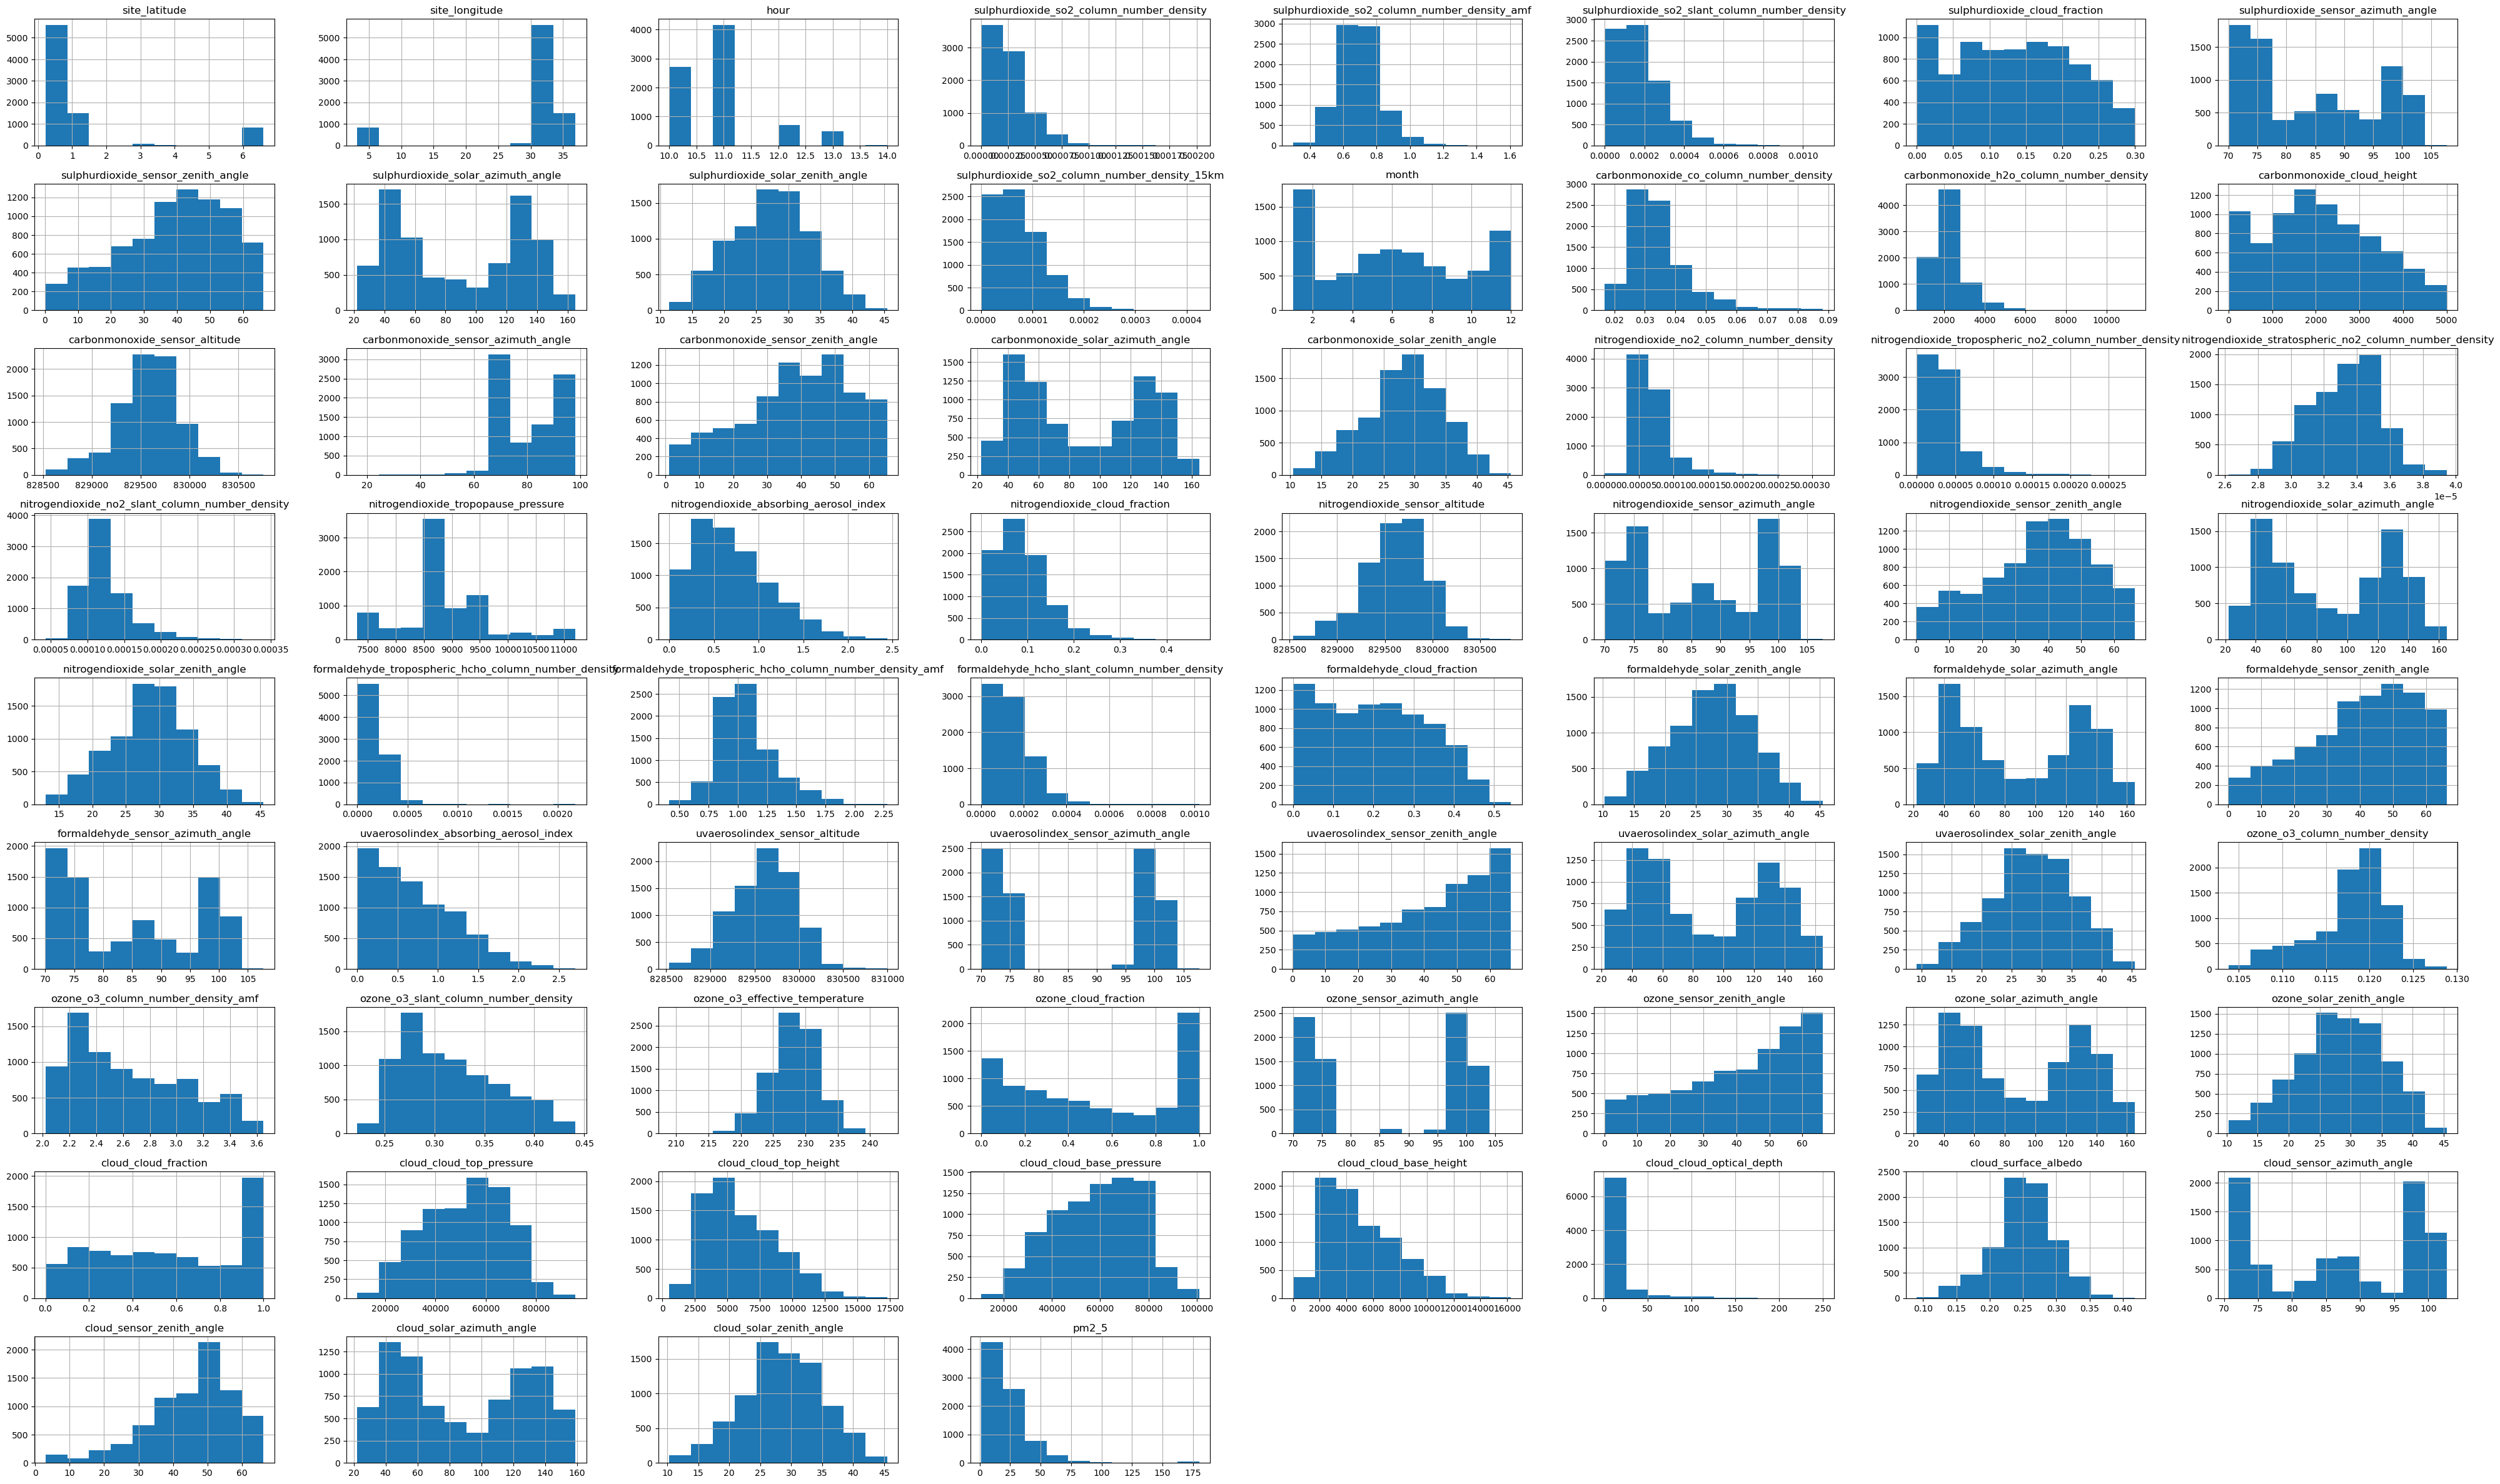

In [23]:
# Numerical columns distribution
df_0.hist(figsize=(50,30))
plt.show()

In [24]:
df_0.corr()

,site_latitude,site_longitude,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,...,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
site_latitude,1.000000,-0.925838,0.691811,0.034103,-0.038956,-0.010302,0.038864,-0.030585,0.080998,0.332146,...,-0.248886,0.279177,-0.249784,-0.074853,-0.511575,-0.076509,0.059386,0.306493,0.230342,0.306033
site_longitude,-0.925838,1.000000,-0.737978,-0.034562,0.074330,0.014701,-0.042098,-0.012125,-0.048977,-0.358829,...,0.103731,-0.126665,0.104132,0.046091,0.419027,0.056178,-0.095512,-0.325698,-0.147892,-0.338030
hour,0.691811,-0.737978,1.000000,0.010082,-0.070112,-0.025205,0.029364,0.227156,-0.064175,0.216157,...,-0.157866,0.176943,-0.156909,-0.031899,-0.325027,0.389661,-0.017440,0.201619,0.420026,0.204615
sulphurdioxide_so2_column_number_density,0.034103,-0.034562,0.010082,1.000000,-0.294805,0.945447,0.001506,-0.074952,0.182947,0.022452,...,-0.012670,0.006000,-0.013441,0.010456,-0.026854,0.020117,0.060172,0.014922,0.004012,0.065501
sulphurdioxide_so2_column_number_density_amf,-0.038956,0.074330,-0.070112,-0.294805,1.000000,-0.073239,0.164571,0.016045,0.037050,-0.058600,...,-0.056002,0.065569,-0.053029,0.008017,0.082502,-0.084897,-0.008660,-0.041000,0.065220,-0.170051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cloud_sensor_azimuth_angle,-0.076509,0.056178,0.389661,0.020117,-0.084897,0.002782,-0.092575,0.255415,-0.110460,-0.090758,...,-0.119072,0.119605,-0.116596,0.063309,0.046098,1.000000,-0.211732,-0.088237,0.657033,-0.085793
cloud_sensor_zenith_angle,0.059386,-0.095512,-0.017440,0.060172,-0.008660,0.049113,0.036712,-0.016429,0.247877,0.101803,...,0.082140,-0.073114,0.082426,0.081363,0.156483,-0.211732,1.000000,0.091484,0.018469,0.030824
cloud_solar_azimuth_angle,0.306493,-0.325698,0.201619,0.014922,-0.041000,-0.011954,0.008608,-0.066453,-0.051516,0.968700,...,0.014137,-0.024817,0.014170,-0.040779,-0.224454,-0.088237,0.091484,1.000000,-0.025297,0.264560
cloud_solar_zenith_angle,0.230342,-0.147892,0.420026,0.004012,0.065220,0.002195,0.014634,0.176998,0.041282,-0.044294,...,-0.295480,0.309804,-0.293699,0.024803,-0.089123,0.657033,0.018469,-0.025297,1.000000,0.053390


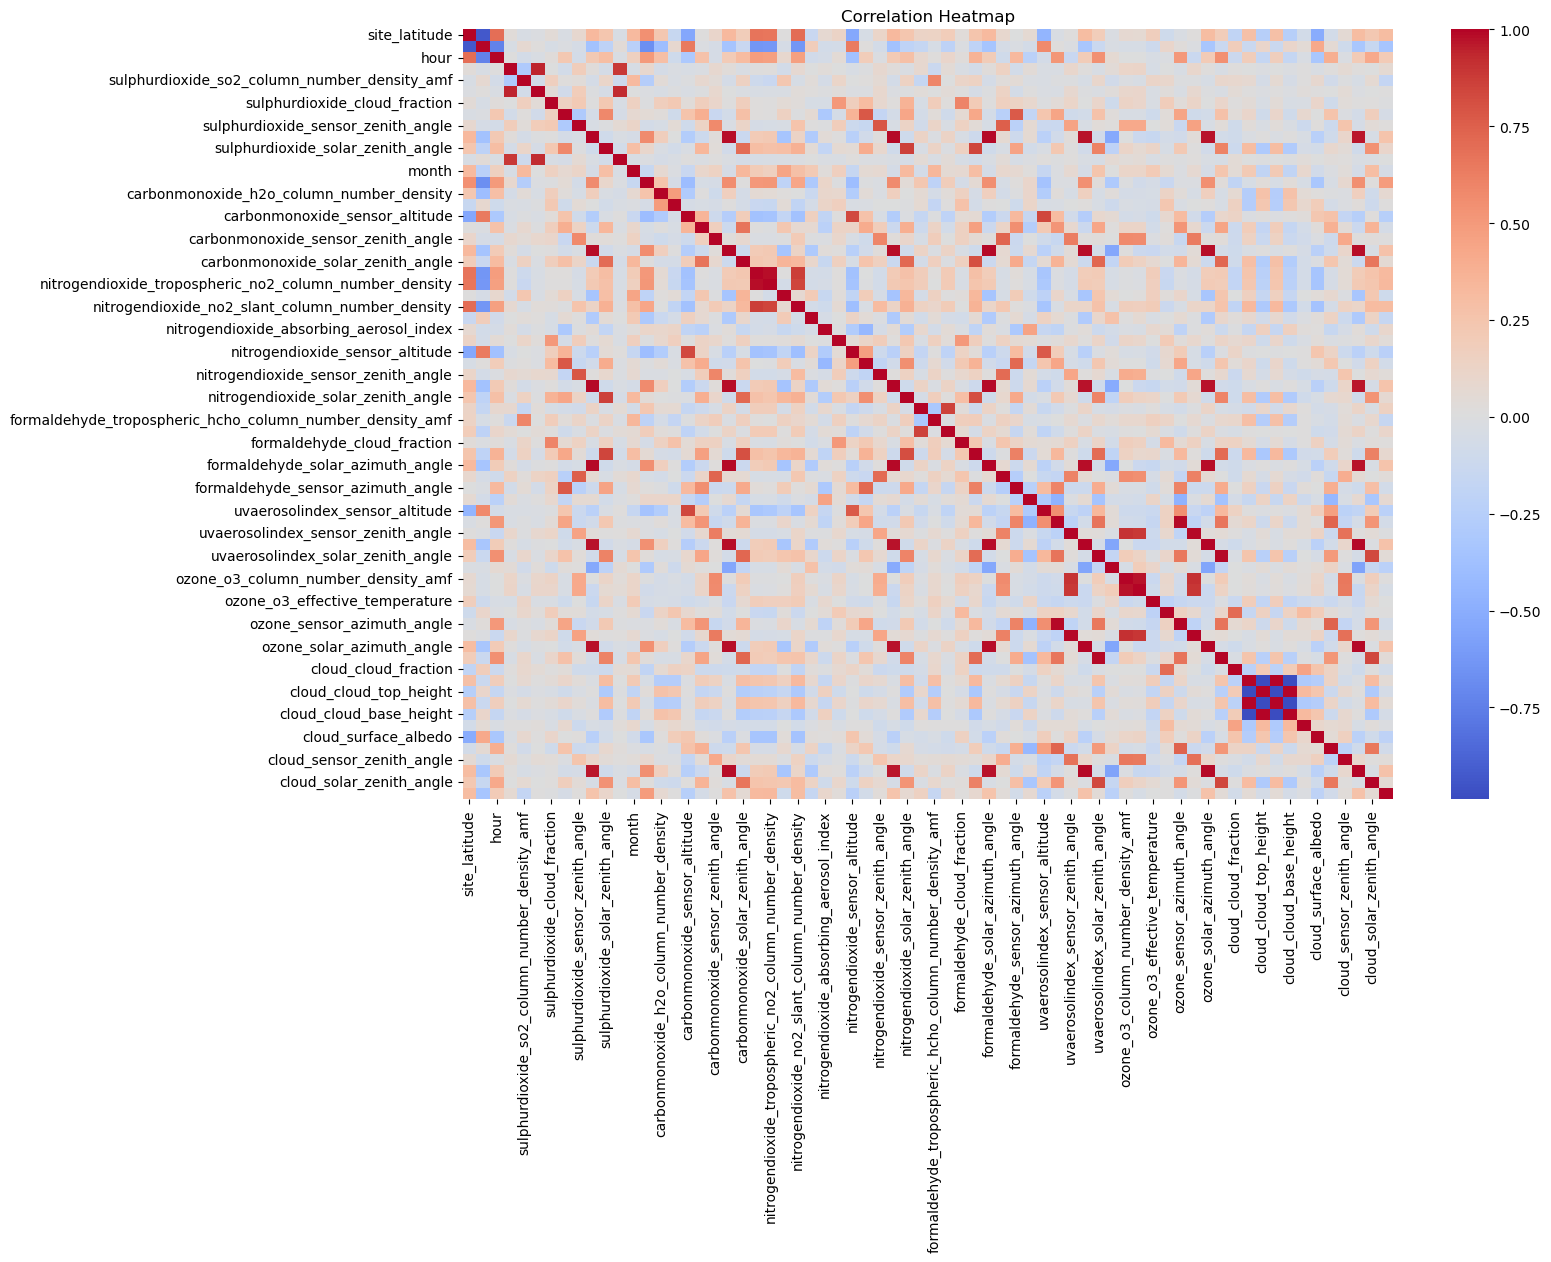

In [25]:
# Correlation Heatmap
correlation_matrix = df_0.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

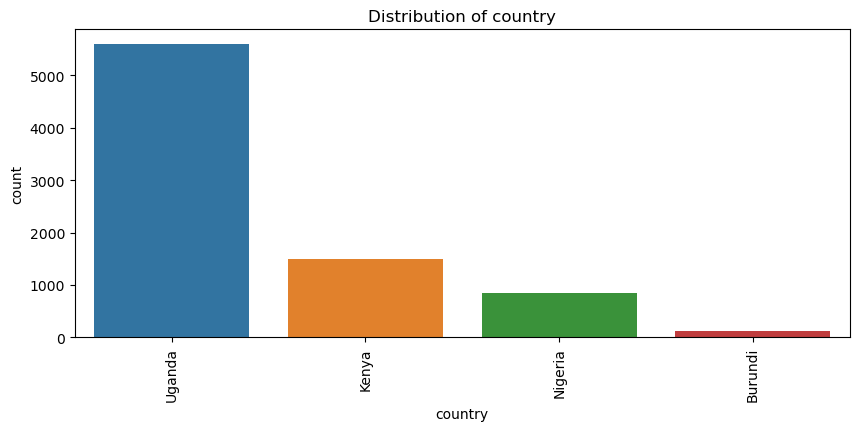

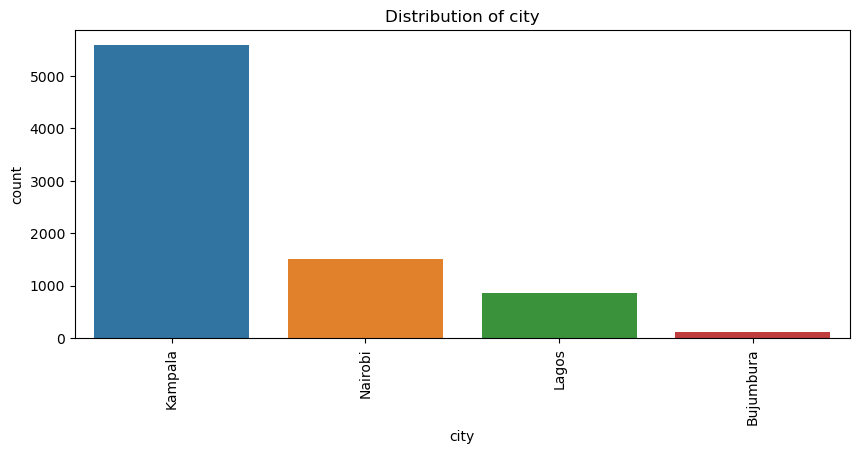

In [26]:
# Explore categorical features
categorical_columns = ['country', 'city']
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=df_1, order=df_1[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

### Feature Engineering and Data Preprocessing

In [28]:
df_2 = pd.concat([df_1,df_0], axis = 1)

In [29]:
df_2.head()

,id,site_id,city,country,date,site_latitude,site_longitude,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,...,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
0,id_vjcx08sz91,6531a46a89b3300013914a36,Lagos,Nigeria,2023-10-25,6.53257,3.39936,13,0.000262,0.701246,...,6054.152723,58691.919068,5071.351870,16.268318,0.251779,86.934775,45.433655,88.501771,28.692221,12.015000
1,id_bkg215syli,6531a46a89b3300013914a36,Lagos,Nigeria,2023-11-02,6.53257,3.39936,12,0.000262,0.701246,...,6054.152723,58691.919068,5071.351870,16.268318,0.251779,86.934775,45.433655,88.501771,28.692221,42.267200
2,id_oui2pot3qd,6531a46a89b3300013914a36,Lagos,Nigeria,2023-11-03,6.53257,3.39936,13,0.000262,0.701246,...,6791.682888,51171.802486,5791.682829,11.816715,0.192757,96.411890,61.045123,121.307414,41.898269,39.450741
3,id_9aandqzy4n,6531a46a89b3300013914a36,Lagos,Nigeria,2023-11-08,6.53257,3.39936,14,0.000262,0.701246,...,4121.366774,73693.854368,3121.366714,11.168862,0.172936,97.111566,55.279281,123.685934,41.032812,10.537600
4,id_ali5x2m4iw,6531a46a89b3300013914a36,Lagos,Nigeria,2023-11-09,6.53257,3.39936,13,0.000267,0.774656,...,1451.050659,96215.906250,451.050598,10.521009,0.153114,97.811241,49.513439,126.064453,40.167355,19.431731


#### Dealing with Categorical Variables

In [30]:
cat = ['city', 'country', 'site_latitude', 'site_longitude']

df_2 = pd.get_dummies(df_2, columns=cat, drop_first = True)

In [31]:
df_2.head()

,id,site_id,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,...,site_longitude_36.805005,site_longitude_36.810364,site_longitude_36.81215,site_longitude_36.8191395,site_longitude_36.821671,site_longitude_36.82314,site_longitude_36.830761,site_longitude_36.861865,site_longitude_36.886487,site_longitude_36.914272
0,id_vjcx08sz91,6531a46a89b3300013914a36,2023-10-25,13,0.000262,0.701246,0.000174,0.133458,84.493954,39.037141,...,False,False,False,False,False,False,False,False,False,False
1,id_bkg215syli,6531a46a89b3300013914a36,2023-11-02,12,0.000262,0.701246,0.000174,0.133458,84.493954,39.037141,...,False,False,False,False,False,False,False,False,False,False
2,id_oui2pot3qd,6531a46a89b3300013914a36,2023-11-03,13,0.000262,0.701246,0.000174,0.133458,84.493954,39.037141,...,False,False,False,False,False,False,False,False,False,False
3,id_9aandqzy4n,6531a46a89b3300013914a36,2023-11-08,14,0.000262,0.701246,0.000174,0.133458,84.493954,39.037141,...,False,False,False,False,False,False,False,False,False,False
4,id_ali5x2m4iw,6531a46a89b3300013914a36,2023-11-09,13,0.000267,0.774656,0.000207,0.223403,97.811241,49.513344,...,False,False,False,False,False,False,False,False,False,False


In [32]:
df_2['date'] = pd.to_datetime(df_2['date'])
# Create additional features from 'date' if necessary
df_2['year'] = df_2['date'].dt.year
df_2['day'] = df_2['date'].dt.day

# Drop the original 'date','id', 'site_id  column
df_2 = df_2.drop(columns=['date','id', 'site_id'])

In [33]:
# Split the data
X = df_2.drop(columns=['pm2_5'])
y = df_2['pm2_5']

#### FEATURE SCALING

In [34]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Machine Leanring

#### Building the Models

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=400, 
        learning_rate=0.05, 
        max_depth=7, 
        min_samples_split=5, 
        min_samples_leaf=4, 
        subsample=1, 
        random_state=42
    )
}

# Dictionary to store RMSE values
rmse_values = {}

# Dictionary to store predictions
predictions = {}


# Train, predict, and calculate RMSE for each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values[model_name] = rmse

#### Evaluate the models

In [36]:
# Create a DataFrame for comparison
rmse_df = pd.DataFrame.from_dict(rmse_values, orient='index', columns=['RMSE'])

rmse_df

,RMSE
Decision Tree,13.356105
Random Forest,10.450451
Gradient Boosting,9.799172


#### Performance Analysis

From the RMSE values:

1. **Gradient Boosting** has the lowest RMSE, indicating the best performance among the three models.
2. **Random Forest** comes next, with a slightly higher RMSE than Gradient Boosting.
3. **Decision Tree** has the highest RMSE, indicating the least performance among the three.

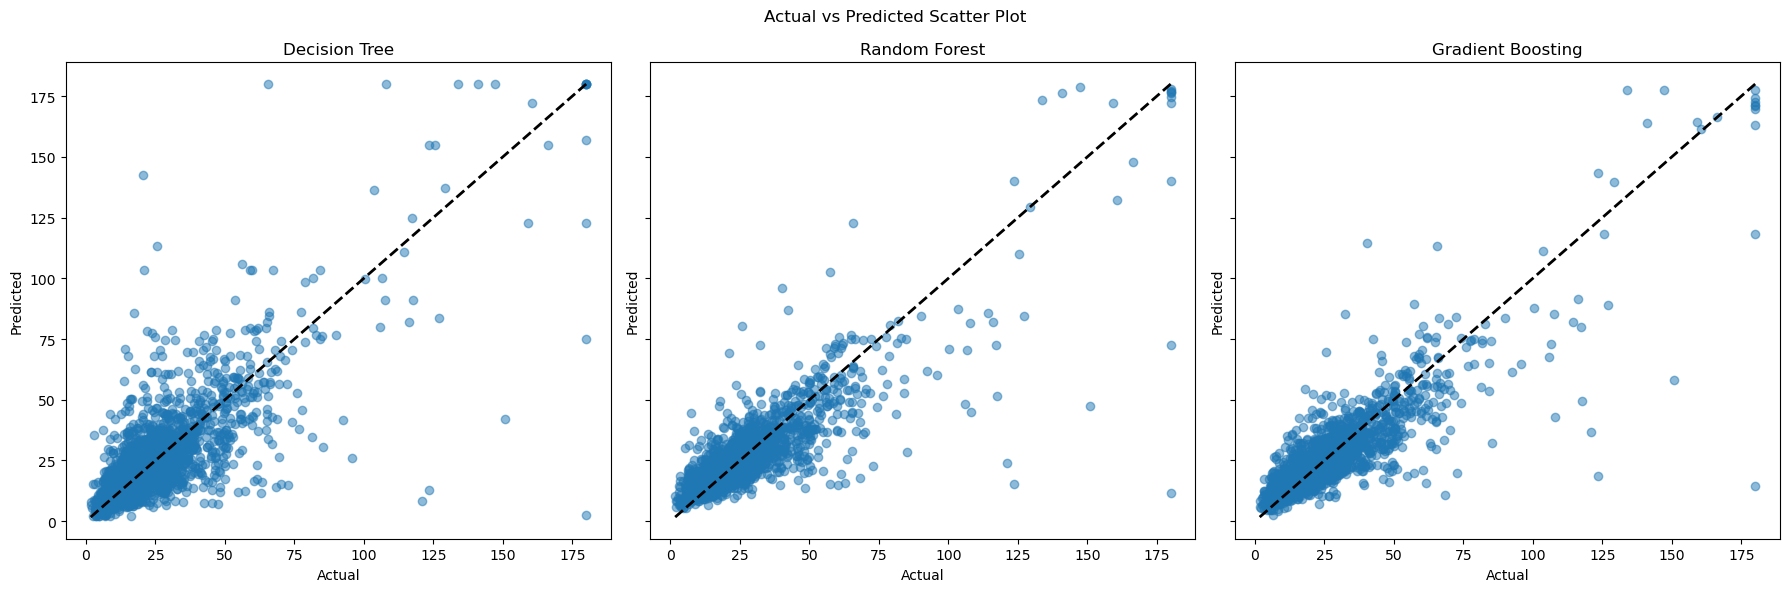

In [37]:
# Scatter plot of actual vs predicted values for each model
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('Actual vs Predicted Scatter Plot')

for ax, (model_name, y_pred) in zip(axes, predictions.items()):
    ax.scatter(y_test, y_pred, alpha=0.5)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    ax.set_title(model_name)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

plt.tight_layout()
plt.show()

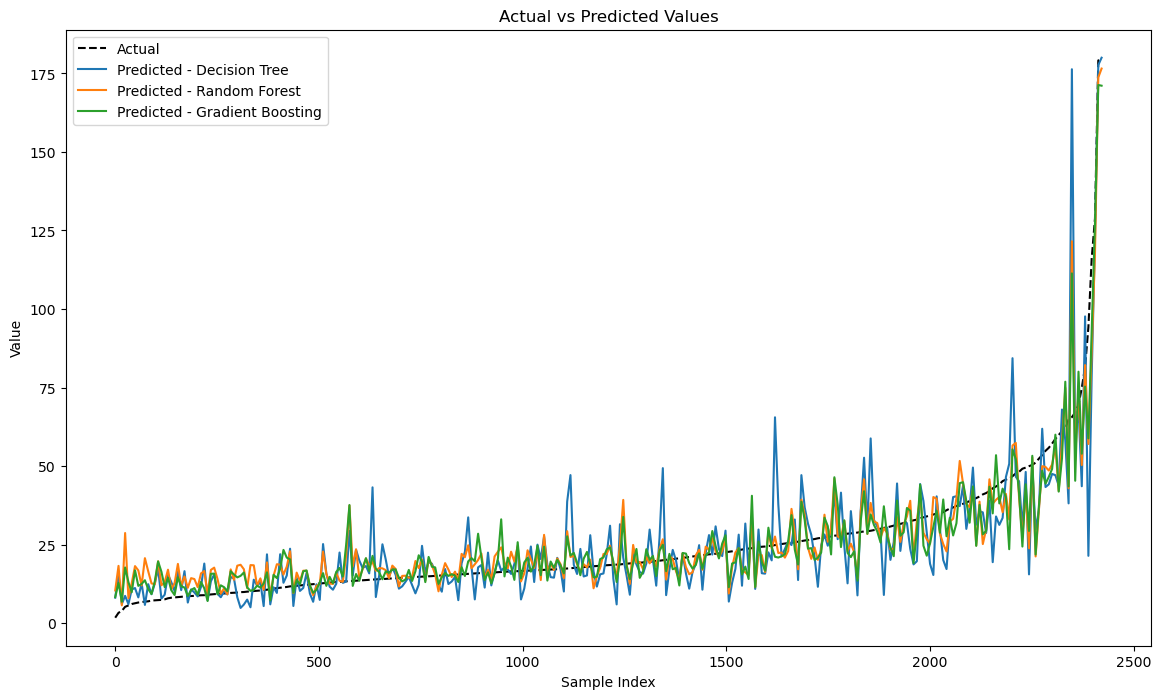

In [38]:
# Function to create smooth line curves
def smooth_curve(x, y, smooth_factor=300):
    x_new = np.linspace(x.min(), x.max(), smooth_factor)
    spline = make_interp_spline(x, y, k=3)
    y_smooth = spline(x_new)
    return x_new, y_smooth

# Plotting the actual and predicted values for each model
plt.figure(figsize=(14, 8))

# Sort the data points for smooth curve plotting
y_test_sorted = np.sort(y_test)
y_test_idx = np.argsort(y_test)

# Plot actual values with smooth curve
x_smooth, y_smooth = smooth_curve(np.arange(len(y_test)), y_test_sorted)
plt.plot(x_smooth, y_smooth, label='Actual', color='black', linestyle='--')

# Plot predicted values for each model with smooth curves
for model_name, y_pred in predictions.items():
    y_pred_sorted = y_pred[y_test_idx]
    x_smooth, y_smooth = smooth_curve(np.arange(len(y_pred)), y_pred_sorted)
    plt.plot(x_smooth, y_smooth, label=f'Predicted - {model_name}')

plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

### Model Comparison

| Model             | RMSE      | Strengths                                                     | Weaknesses                                                           |
|-------------------|-----------|---------------------------------------------------------------|----------------------------------------------------------------------|
| Decision Tree     | 13.356105 | Simple and interpretable, Minimal data preparation           | Prone to overfitting, Sensitive to noisy data.                       |
| Random Forest     | 10.450451 | Reduces overfitting, Handles large datasets and outliers well| complex ensemble of many trees, Computationally expensive and slower to train   |
| Gradient Boosting | 9.799172  | High accuracy, Handles non-linear relationships, Provides feature importance. | Computationally intensive and longer training times. |


In [39]:
yPredict = pd.DataFrame( { "actual": y_test, 
"predicted": y_pred } ) 
yPredict.head()

,actual,predicted
742,18.009200,19.221174
2127,28.199700,37.483722
2107,19.466667,18.868977
2943,47.629700,47.489620
6691,41.196300,41.903635
